<a href="https://colab.research.google.com/github/PabloCGarcia/deepLearning/blob/main/Clase04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np

red_wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
from tensorflow.keras.utils import to_categorical

x = red_wine.copy()
quality = x.pop('quality')
x = np.asarray(x)
qualitynpa = quality.to_numpy()
quality2d=qualitynpa.reshape(-1,1)
y = to_categorical(quality2d)
#enc = OneHotEncoder(handle_unknown='ignore')
#encTrained=enc.fit(quality2d)
#y=encTrained.transform(quality2d)

print(y[1], quality2d[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0.] [5]


In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation="softmax"),
])



In [72]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.33)

In [69]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.000001,
    restore_best_weights=True,
)

In [73]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
17/17 [==============================] - 1s 23ms/step - loss: 0.9947 - accuracy: 0.5780 - val_loss: 1.0794 - val_accuracy: 0.5265
Epoch 2/100
17/17 [==============================] - 0s 11ms/step - loss: 0.9836 - accuracy: 0.5686 - val_loss: 1.1027 - val_accuracy: 0.5473
Epoch 3/100
17/17 [==============================] - 0s 12ms/step - loss: 0.9664 - accuracy: 0.5780 - val_loss: 1.1152 - val_accuracy: 0.5436
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 0.9905 - accuracy: 0.5761 - val_loss: 1.1601 - val_accuracy: 0.5189
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 1.0119 - accuracy: 0.5836 - val_loss: 1.1403 - val_accuracy: 0.5246
Epoch 6/100
17/17 [==============================] - 0s 12ms/step - loss: 0.9808 - accuracy: 0.5331 - val_loss: 1.1805 - val_accuracy: 0.5189
Epoch 7/100
17/17 [==============================] - 0s 12ms/step - loss: 0.9945 - accuracy: 0.5546 - val_loss: 1.0895 - val_accuracy: 0.5530
Epoch 

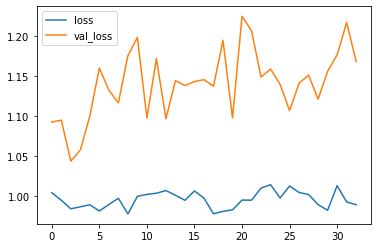

In [71]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot();

In [82]:
y_pred = model.predict(X_valid)
y_pred_cat = np.argmax(y_pred, axis=1)
print(y_pred[1], y_pred_cat[1])

[2.21030035e-07 9.82530821e-08 9.71735332e-08 1.94893330e-02
 8.27072933e-02 6.46247983e-01 2.41833284e-01 9.60061327e-03
 1.21079895e-04] 5


In [90]:
Y_valid[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [93]:
y_real_cat = [np.argmax(y, axis=None, out=None) for y in Y_valid]

In [94]:
y_real_cat[1]

5

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_real_cat, y_pred_cat)
print(cm)

[[  0   0   4   1   0   0]
 [  0   0  16   3   0   0]
 [  0   0 193  36   0   0]
 [  0   0  95 106   2   0]
 [  0   0  11  54   4   0]
 [  0   0   0   3   0   0]]


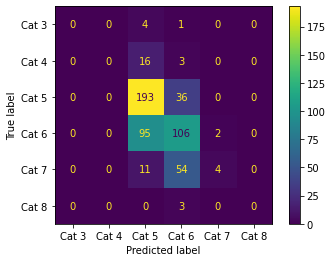

In [97]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["Cat 3", "Cat 4", "Cat 5", "Cat 6", "Cat 7", "Cat 8"])
display.plot()

plot.show()